## Importing the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

##### Get the current working direcrtory and read the dataset

In [2]:
print(os.getcwd())
song_data = pd.read_csv('SpotifySongPolularityAPIExtract.csv')
song_data.head()

/Users/satyanarayanakakarla/Downloads


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


### Total 17 variables are present 

In [73]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

##### Get the datatypes of the columns to filter the data

In [3]:
song_data.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

##### We will remove the object columns artist_name, track_id, track_name

##### Filter to include only numeric columns

In [4]:
numeric_data = song_data.select_dtypes(include = ['float64', 'int64'])
numeric_data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


#### Describing the data

In [5]:
numeric_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


#### These varaiables' values are ranging between 0 and 1.
acousticness, danceability, energy, instrumentalness, liveness, loudness, mode, speechiness, valence

#### Correlation plot of the numeric columns

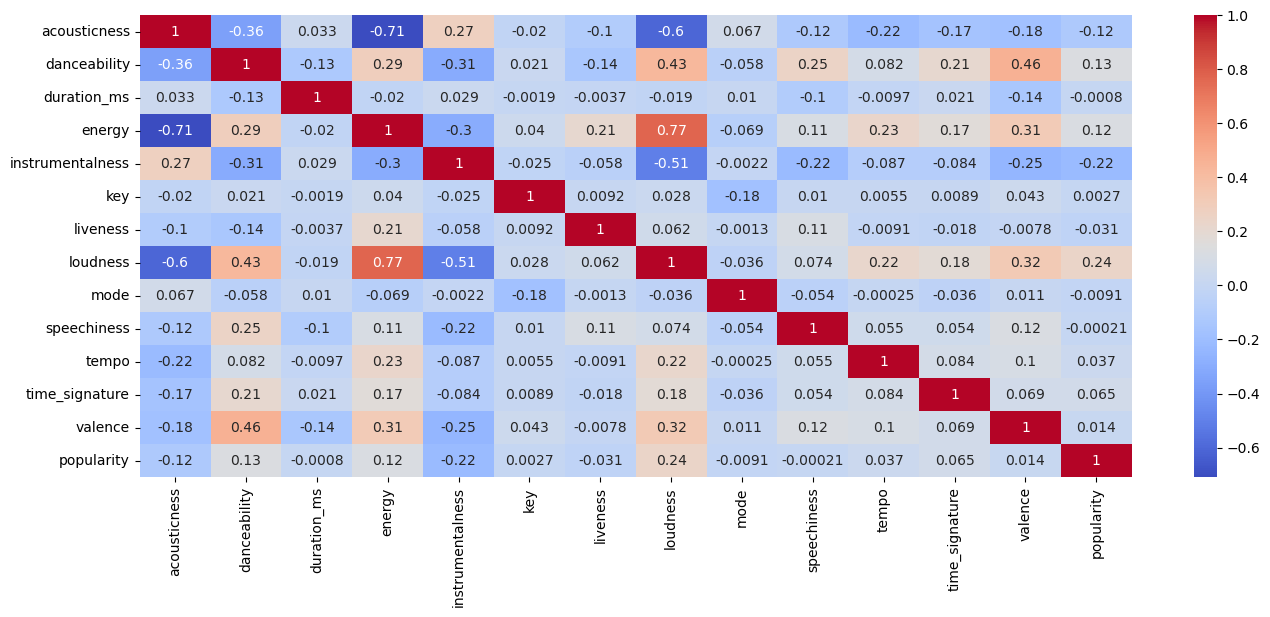

In [6]:
plt.figure(figsize = (16,6))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.show()

### Box Plots

### Box plot of duration_ms

<Axes: >

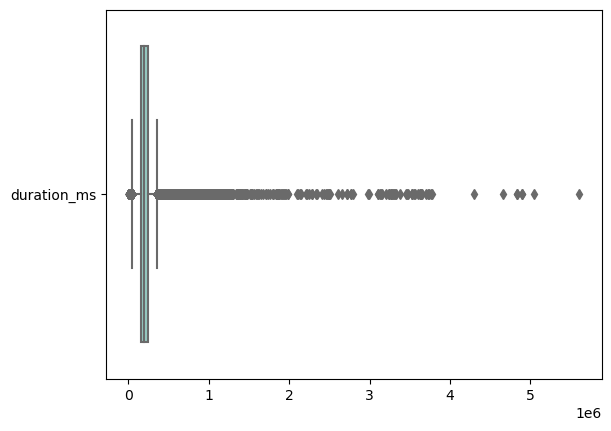

In [7]:
sns.boxplot(data=numeric_data[['duration_ms']], orient='h', palette='Set3')

##### Most of the data lies between 0 & 1 ( x 60000) ms

#### Box plots of
1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. speechiness
7. valence

The data that have value ranges between 0 and 1.

(array([   299.,   1749.,      0.,  12666., 115949.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

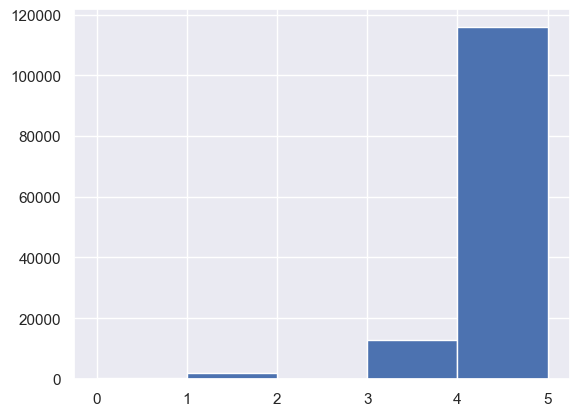

In [76]:
plt.hist(numeric_data.time_signature, bins=np.arange(numeric_data.time_signature.min(), numeric_data.time_signature.max()+1))


[Text(0, 0, 'acousticness'),
 Text(1, 0, 'danceability'),
 Text(2, 0, 'energy'),
 Text(3, 0, 'instrumentalness'),
 Text(4, 0, 'liveness'),
 Text(5, 0, 'speechiness'),
 Text(6, 0, 'valence')]

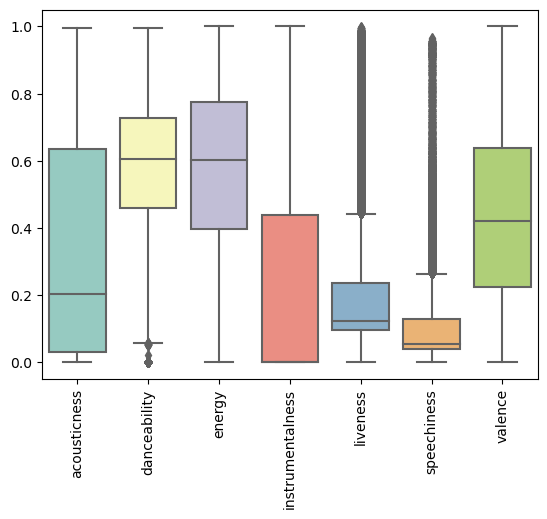

In [9]:
ax = sns.boxplot(data=numeric_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']], orient='v', palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, va='top')

##### Liveness and speechiness have outliers.

#### Box Plot of tempo

<Axes: >

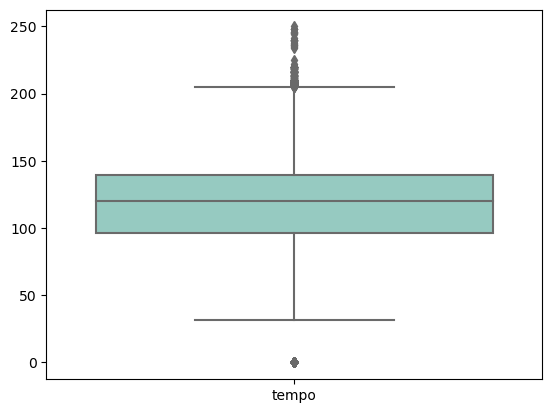

In [10]:
sns.boxplot(data=numeric_data[['tempo']], orient='v', palette='Set3')

##### Tempo also has a few outliers

#### Box plot of popularity

<Axes: >

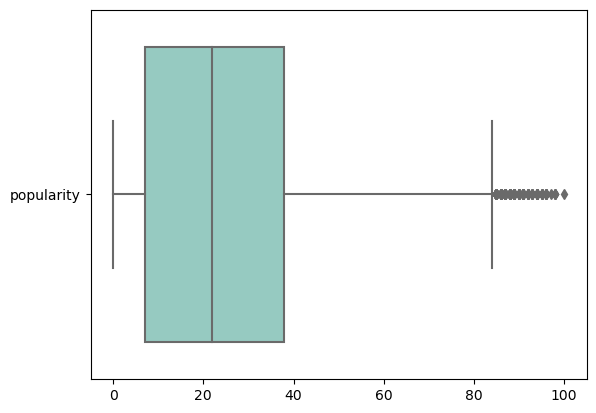

In [11]:
sns.boxplot(data=numeric_data[['popularity']], orient='h', palette='Set3')

#### Converting the duration_ms to minutes

In [12]:
numeric_data['duration_min'] = numeric_data.duration_ms.apply(lambda x: x / (60000))
numeric_data.duration_min.head()

0    3.972883
1    3.580000
2    2.315217
3    2.089683
4    2.066933
Name: duration_min, dtype: float64

#### To convert the milliseconds to minutes, we divide the value by 60000

#### Box plot of duration after conversion

<Axes: >

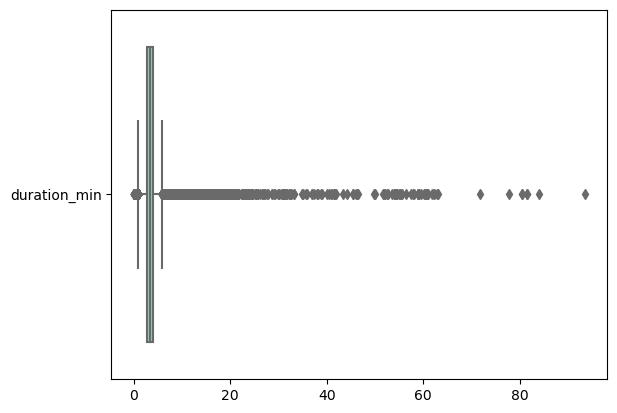

In [13]:
sns.boxplot(data=numeric_data[['duration_min']], orient='h', palette='Set3')

#### Removing the outliers from
1. duration_mins
2. tempo
3. liveness
4. speechiness

In [14]:
ol_rem_data = numeric_data
for column in ['duration_min', 'tempo', 'liveness', 'speechiness']:
    # Calculate the IQR
    Q1 = ol_rem_data[column].quantile(0.25)
    Q3 = ol_rem_data[column].quantile(0.75)
    IQR = Q3  - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a mask for each column that identifies the rows where the values are within the bounds
    mask = (ol_rem_data[column] >= lower_bound) & (ol_rem_data[column] <= upper_bound)
    
    # Use the mask to filter the DataFrame and keep only the rows that are within the bounds
    ol_rem_data = ol_rem_data[mask]

##### Since we have a large dataset at our disposal, we consider the 1st and 3rd queartile to remove the outliers

#### Copying the data to re-use when required

In [16]:
ol_rem_data_cp = ol_rem_data.copy()

#### Dropping the original duration_ms column

In [17]:
ol_rem_data.drop('duration_ms', axis = 1, inplace=True)

#### Creating the dummy variables for time_signature column

In [18]:
time_sig_dummies = pd.get_dummies(ol_rem_data.time_signature, prefix='time_sig_')
## Dropping the referrant column 'time_sig__1'
time_sig_dummies.drop('time_sig__1', axis = 1, inplace=True)
time_sig_dummies

,time_sig__0,time_sig__3,time_sig__4,time_sig__5
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
...,...,...,...,...
130658,0,0,1,0
130659,0,0,1,0
130660,0,0,1,0
130661,0,0,1,0


#### Creating the dummy variables for key column

In [19]:
key_dummies = pd.get_dummies(ol_rem_data.key, prefix='key_')
## Dropping the referrant column 'key__2'
key_dummies.drop('key__2', axis = 1, inplace=True)
key_dummies

,key__0,key__1,key__3,key__4,key__5,key__6,key__7,key__8,key__9,key__10,key__11
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
130658,0,0,0,0,0,0,0,0,0,0,1
130659,0,0,0,0,0,0,0,0,1,0,0
130660,0,0,0,0,0,0,0,1,0,0,0
130661,0,0,0,1,0,0,0,0,0,0,0


#### Merging the dummy data with the original data

In [20]:
ol_rem_data = ol_rem_data.merge(key_dummies, left_index=True, right_index=True)
ol_rem_data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,key__1,key__3,key__4,key__5,key__6,key__7,key__8,key__9,key__10,key__11
2,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,...,0,0,0,0,0,0,0,1,0,0
3,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,...,0,0,0,1,0,0,0,0,0,0
4,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,...,0,0,0,0,0,1,0,0,0,0
5,0.001150,0.810,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,...,0,0,0,0,0,0,0,1,0,0
6,0.000539,0.819,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,...,0,0,1,0,0,0,0,0,0,0


In [21]:
ol_rem_data = ol_rem_data.merge(time_sig_dummies, left_index=True, right_index=True)
ol_rem_data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,key__6,key__7,key__8,key__9,key__10,key__11,time_sig__0,time_sig__3,time_sig__4,time_sig__5
2,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,...,0,0,0,1,0,0,0,0,1,0
3,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,...,0,0,0,0,0,0,0,0,1,0
4,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,...,0,1,0,0,0,0,0,0,1,0
5,0.001150,0.810,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,...,0,0,0,1,0,0,0,0,1,0
6,0.000539,0.819,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,...,0,0,0,0,0,0,0,0,1,0


##### After merging, we have a total of 29 columns

#### Droppping the original columns key and time_signature

In [22]:
ol_rem_data.drop(['key', 'time_signature'], axis = 1, inplace = True)

##### We drop the original columns and one referrent column for each dummy variable because they are not needed

Referrent column:
If there are c groups in a categorical variable, we will create c-1 dummy variables as the data is contained in the c-1 groups

# Module - Linear Regression

### Single and Multiple Linear Regression Models

In [23]:
def get_lr_model(data):
    X = data.loc[:, data.columns != 'popularity']
    y = data.loc[:, data.columns == 'popularity']
    X = sm.add_constant(X)
    # Create the linear regression model
    model = sm.OLS(y, X)
    # Fit the model to the data
    results = model.fit()
    return results

In [24]:
def get_vif(data):
    vif = pd.DataFrame()
    if 'const' in data.columns:
        vif_cols = data.loc[:, data.columns != 'const'].columns
    vif_cols = data.columns
    vif['Features'] = vif_cols
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(vif_cols))]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [25]:
def get_high_vif_cols(vif_df, cutoff=5):
    return list(vif_df[vif_df.VIF > cutoff].Features)

In [26]:
def get_non_sig_cols(model):
    non_sig_cols = model.pvalues[model.pvalues > 0.05].index.tolist()
    return non_sig_cols

In [27]:
def standardize(data, cols_to_std, method = 'standard'):
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    # Fit the scaler to the data and transform the data
    data[[cols_to_std]] = scaler.fit_transform(data[data])
    return

#### First Model Iteration

In [28]:
model_1 = get_lr_model(ol_rem_data)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     347.9
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:18:50   Log-Likelihood:            -4.3133e+05
No. Observations:               98728   AIC:                         8.627e+05
Df Residuals:                   98701   BIC:                         8.630e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.0372      0.876     42.270      0.000      35.320      38.754
acousticness         1.5283      0.273      5.607      0.000       0.994       2.063
danceability         3.7687      0.440      8.561      0.000       2.906       4.631
energy              -6.1510      0.479    -12.837      0.000      -7.090      -5.212
instrumentalness    -7.0606      0.208    -33.958      0.000      -7.468      -6.653
liveness            -4.4175      0.705     -6.262      0.000      -5.800      -3.035
loudness             0.7917      0.018     43.090      0.000       0.756       0.828
mode                 0.0371      0.130      0.285      0.776      -0.218       0.292
speechiness          3.0643      1.197      2.559      0.010       0.717       5.411
tempo               -0.0078      0.002     -3.514      0.000      -0.012      -0.003
valence             -7.2386      0.282    -25.665      0.000      -7.791      -6.686
duration_min         0.1727      0.066      2.613      0.009       0.043       0.302
key__0               0.4406      0.264      1.668      0.095      -0.077       0.959
key__1               0.6995      0.271      2.585      0.010       0.169       1.230
key__3               0.6241      0.382      1.636      0.102      -0.124       1.372
key__4               0.7025      0.304      2.307      0.021       0.106       1.299
key__5               0.6484      0.289      2.246      0.025       0.083       1.214
key__6               1.7263      0.309      5.596      0.000       1.122       2.331
key__7              -0.6832      0.270     -2.531      0.011      -1.212      -0.154
key__8               0.8464      0.300      2.825      0.005       0.259       1.434
key__9              -0.4411      0.281     -1.572      0.116      -0.991       0.109
key__10              0.3780      0.306      1.235      0.217      -0.222       0.978
key__11              1.1198      0.298      3.764      0.000       0.537       1.703
time_sig__0          4.6171      8.564      0.539      0.590     -12.168      21.402
time_sig__3          0.4109      0.587      0.700      0.484      -0.740       1.562
time_sig__4          1.7342      0.562      3.087      0.002       0.633       2.835
time_sig__5          0.7892      0.703      1.122      0.262      -0.589       2.168
==============================================================================
Omnibus:                     4435.327   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.605
Skew:                           0.438   Prob(JB):                         0.00
Kurtosis:                       2.536   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

#### There is multicolinearity and non-significant columns invloved
#### R-squared and adjusted R-squared are about 0.08 which is very low 
#### There are a few non-significant columns like mode, key__5 etc..
#### We will remove those values and try the next iteration

#### Second Model Iteration

In [29]:
vif_1 = get_vif(ol_rem_data.drop('popularity', axis = 1))
hvc_1 = get_high_vif_cols(vif_1, 5)
print(f"High VIF Columns")
print(hvc_1)

nsc_1 = get_non_sig_cols(model_1)
print(f"Non Significant Columns")
print(nsc_1)
cr_1 = hvc_1 + nsc_1

High VIF Columns
['time_sig__4', 'energy', 'tempo', 'danceability', 'duration_min', 'loudness', 'time_sig__3', 'valence']
Non Significant Columns
['mode', 'key__0', 'key__3', 'key__9', 'key__10', 'time_sig__0', 'time_sig__3', 'time_sig__5']


In [30]:
model_data_2 = ol_rem_data.drop(cr_1, axis = 1)
model_2 = get_lr_model(model_data_2)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     521.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:21:28   Log-Likelihood:            -4.3287e+05
No. Observations:               98728   AIC:                         8.658e+05
Df Residuals:                   98716   BIC:                         8.659e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.0894      0.193    151.041      0.000      28.712      29.467
acousticness        -2.9346      0.190    -15.455      0.000      -3.307      -2.562
instrumentalness   -11.6850      0.179    -65.419      0.000     -12.035     -11.335
liveness            -5.7083      0.699     -8.168      0.000      -7.078      -4.338
speechiness          2.1423      1.164      1.840      0.066      -0.139       4.424
key__1               0.6233      0.212      2.941      0.003       0.208       1.039
key__4               0.7150      0.252      2.836      0.005       0.221       1.209
key__5               0.4427      0.234      1.895      0.058      -0.015       0.900
key__6               1.5712      0.258      6.087      0.000       1.065       2.077
key__7              -0.8509      0.211     -4.026      0.000      -1.265      -0.437
key__8               0.6692      0.249      2.688      0.007       0.181       1.157
key__11              0.9126      0.243      3.759      0.000       0.437       1.388
==============================================================================
Omnibus:                     5156.799   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4694.261
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       2.508   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R-squared deteriorated even more
#### Let's remove the insignificant columns and try again

In [31]:
vif_2 = get_vif(model_data_2)
hvc_2 = get_high_vif_cols(vif_2, 5)
print(f"High VIF Columns")
print(hvc_2)

nsc_2 = get_non_sig_cols(model_2)
print(f"Non Significant Columns")
print(nsc_2)
cr_2 = hvc_2 + nsc_2

High VIF Columns
[]
Non Significant Columns
['speechiness', 'key__5']


In [33]:
model_data_3 = model_data_2.drop(cr_2, axis = 1)
model_3 = get_lr_model(model_data_3)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     636.4
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:23:57   Log-Likelihood:            -4.3287e+05
No. Observations:               98728   AIC:                         8.658e+05
Df Residuals:                   98718   BIC:                         8.659e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.3406      0.162    180.651      0.000      29.022      29.659
acousticness        -2.9904      0.188    -15.937      0.000      -3.358      -2.623
instrumentalness   -11.7273      0.177    -66.126      0.000     -12.075     -11.380
liveness            -5.6788      0.699     -8.126      0.000      -7.048      -4.309
key__1               0.5759      0.208      2.774      0.006       0.169       0.983
key__4               0.6365      0.249      2.557      0.011       0.149       1.125
key__6               1.5051      0.255      5.902      0.000       1.005       2.005
key__7              -0.9270      0.208     -4.465      0.000      -1.334      -0.520
key__8               0.6096      0.246      2.481      0.013       0.128       1.091
key__11              0.8488      0.239      3.545      0.000       0.379       1.318
==============================================================================
Omnibus:                     5158.072   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4707.287
Skew:                           0.475   Prob(JB):                         0.00
Kurtosis:                       2.509   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
##### The model R-squared remained the same even after deleting the other variables.
##### The remaining variables are significant according to their p-values


##### The coefficients  acousticnes, instrumentalness, liveness, key__1, key__4, key__6, key__7, key__8, key__11 are significant, but the R-squared and adjusted R-squared are very less.

##### This suggests that the variability within each of the predictor variables is high. To mitigate this, we use a technique callled undersampling.

### Fitting a simple regression model to test Hypothesis 3:
#### Hpythoesis 3: Loudness is a significant contributor to a song’s popularity.
##### Although the variable is removed by the model due to high vif value (9.63), we want to see if the variable is important when no other predictors are included

In [34]:
# Hypothesis 3 
model_hyp_3 = get_lr_model(ol_rem_data[['loudness', 'popularity']])
# Print the summary of the model
model_hyp_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     5766.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:27:58   Log-Likelihood:            -4.3285e+05
No. Observations:               98728   AIC:                         8.657e+05
Df Residuals:                   98726   BIC:                         8.657e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0987      0.112    286.037      0.000      31.879      32.319
loudness       0.7317      0.010     75.935      0.000       0.713       0.751
==============================================================================
Omnibus:                     5032.862   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4624.914
Skew:                           0.472   Prob(JB):                         0.00
Kurtosis:                       2.518   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The null hypothesis is loudness is not significant
#### The alternate hypothesis is loudness is significant
According the p-value (0.000), we reject the null hypothesis and conclude the alternate hypothesis that loudness is significant.

1. For a unit change in loudness, there's a 0.7317 units change in the dependent variable.
2. The R-sqaured of the model is 0.055 which means only 5% of variability of model is explained by the loudness variable.
3. The data is not a good fit for the data.

#### Conclusion:
##### The linear model regression is struggling to acheive a good R-squared but the predictor variables are significant
This can be because the dataset is huge and there's a lot of variablility within the predictor variables.
To reduce this effect, undersampling technique can be used to balance the dataset.

#### Undersampling
Undersampling is a technique used in machine learning to address the issue of imbalanced datasets. In an imbalanced dataset, the number of examples in one class is much higher than the number of examples in the other class. This can result in the machine learning model being biased towards the majority class and performing poorly on the minority class.

Undersampling involves reducing the number of examples in the majority class so that the dataset is balanced. A cut-off value for popularity is taken and the dataset is sampled based on the percentage of the value and similar percentage of the unpopular data will also be included.

In [35]:
def split_sample_combine(df, cutoff=55, col='popularity', rand=None):
    # Get the popular songs based on the cutoff
    split_pop_df = df[df[col] > cutoff].copy()
    
    # Get the unpopular songs based on the cutoff
    df_leftover = df[df[col] < cutoff].copy()
    
    # Get the percentage of the popular songs to the original data
    ratio = split_pop_df.shape[0] / df.shape[0]
    
    # Get the percentage of the unpopular songs that we need to add
    ratio_leftover = split_pop_df.shape[0] / df_leftover.shape[0]
    
    # Using sampling, get the number of unpopular songs to add
    unpop_df_leftover, unpop_df_to_add = train_test_split(df_leftover,
                                                          test_size=ratio_leftover,
                                                          random_state = rand)
    
    # Combine the dataframes to get the actual data
    # Split sample combine
    ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)

    # Shuffling the dataframe
    ssc_df = ssc_df.sample(frac=1, random_state=rand).reset_index(drop=True)
    
    # Converting column to category
    ssc_df['pop_bin'] = np.where(ssc_df['popularity'] > cutoff, 1, 0)
    
    return ssc_df

In [36]:
# Take data with popularity cut off
us_lr_55 = split_sample_combine(ol_rem_data)
# Undersampled model 1
model_us_55 = get_lr_model(us_lr_55.drop('pop_bin', axis = 1))
model_us_55.summary()

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:29:05   Log-Likelihood:                -79537.
No. Observations:               17420   AIC:                         1.591e+05
Df Residuals:                   17394   BIC:                         1.593e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.7773      2.678     23.814      0.000      58.528      69.027
acousticness         3.3287      0.831      4.008      0.000       1.701       4.957
danceability        13.3535      1.326     10.073      0.000      10.755      15.952
energy             -15.8165      1.467    -10.779      0.000     -18.693     -12.940
instrumentalness   -10.7294      0.693    -15.489      0.000     -12.087      -9.372
liveness            -6.9565      2.068     -3.364      0.001     -11.009      -2.904
loudness             1.4110      0.060     23.406      0.000       1.293       1.529
mode                -0.0372      0.376     -0.099      0.921      -0.775       0.701
speechiness         13.3815      3.335      4.013      0.000       6.845      19.918
tempo               -0.0122      0.006     -1.923      0.054      -0.025       0.000
valence            -11.5724      0.860    -13.460      0.000     -13.258      -9.887
duration_min        -0.3587      0.213     -1.686      0.092      -0.776       0.058
key__0               0.5829      0.778      0.749      0.454      -0.943       2.108
key__1               1.8263      0.790      2.311      0.021       0.278       3.375
key__3               0.2339      1.139      0.205      0.837      -1.999       2.467
key__4               0.8223      0.885      0.929      0.353      -0.913       2.558
key__5               1.7564      0.851      2.064      0.039       0.088       3.425
key__6               3.0930      0.886      3.489      0.000       1.355       4.831
key__7              -1.6789      0.799     -2.101      0.036      -3.245      -0.113
key__8               1.8780      0.880      2.134      0.033       0.153       3.603
key__9              -1.0252      0.839     -1.222      0.222      -2.670       0.620
key__10              0.7336      0.894      0.820      0.412      -1.019       2.487
key__11              1.7065      0.862      1.979      0.048       0.016       3.397
time_sig__0      -1.754e-13   2.56e-14     -6.855      0.000   -2.26e-13   -1.25e-13
time_sig__3         -2.5086      1.809     -1.386      0.166      -6.055       1.038
time_sig__4          0.1939      1.730      0.112      0.911      -3.197       3.584
time_sig__5         -0.1080      2.178     -0.050      0.960      -4.377       4.161
==============================================================================
Omnibus:                     1734.123   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.373
Skew:                          -0.379   Prob(JB):                    4.04e-187
Kurtosis:                       2.220   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

##### The R-squared improved a little bit but still not significant with a cut off value of 55


In [37]:
vif_us_55 = get_vif(us_lr_55.drop('popularity',axis = 1 ))
hvc_us_55 = get_high_vif_cols(vif_us_55, 5)
print(f"High VIF Columns")
print(hvc_us_55)

nsc_us_55 = get_non_sig_cols(model_us_55)
print(f"Non Significant Columns")
print(nsc_us_55)
cr_us_55 = hvc_us_55 + nsc_us_55

/Users/satyanarayanakakarla/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


High VIF Columns
['time_sig__4', 'energy', 'danceability', 'tempo', 'duration_min', 'loudness', 'valence', 'time_sig__3']
Non Significant Columns
['mode', 'tempo', 'duration_min', 'key__0', 'key__3', 'key__4', 'key__9', 'key__10', 'time_sig__3', 'time_sig__4', 'time_sig__5']


In [39]:
# Take data with popularity cut off
us_lr_65 = split_sample_combine(ol_rem_data, cutoff=65)
# Undersampled model 1
model_us_65 = get_lr_model(us_lr_65.drop('pop_bin', axis = 1))
model_us_65.summary()

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     46.86
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.19e-209
Time:                        07:30:25   Log-Likelihood:                -26806.
No. Observations:                5752   AIC:                         5.366e+04
Df Residuals:                    5726   BIC:                         5.384e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               68.3767      5.515     12.397      0.000      57.564      79.189
acousticness         3.0971      1.632      1.898      0.058      -0.102       6.296
danceability        21.2296      2.603      8.156      0.000      16.127      26.332
energy             -13.6308      2.872     -4.747      0.000     -19.260      -8.001
instrumentalness   -18.8371      1.463    -12.880      0.000     -21.704     -15.970
liveness            -7.3927      3.968     -1.863      0.062     -15.171       0.385
loudness             1.3022      0.123     10.600      0.000       1.061       1.543
mode                -0.7942      0.721     -1.102      0.271      -2.207       0.619
speechiness         10.9973      6.265      1.755      0.079      -1.285      23.280
tempo               -0.0102      0.012     -0.849      0.396      -0.034       0.013
valence            -13.7316      1.655     -8.297      0.000     -16.976     -10.487
duration_min        -0.6609      0.430     -1.536      0.125      -1.504       0.183
key__0               2.9521      1.494      1.976      0.048       0.024       5.881
key__1               4.6457      1.499      3.098      0.002       1.706       7.585
key__3               0.0014      2.256      0.001      0.999      -4.422       4.424
key__4              -0.4594      1.694     -0.271      0.786      -3.780       2.861
key__5               3.8389      1.653      2.322      0.020       0.598       7.080
key__6               4.0988      1.681      2.438      0.015       0.803       7.394
key__7               0.9456      1.533      0.617      0.537      -2.060       3.952
key__8               3.0251      1.687      1.793      0.073      -0.282       6.333
key__9              -3.2579      1.624     -2.006      0.045      -6.442      -0.074
key__10              1.7832      1.700      1.049      0.294      -1.549       5.115
key__11              3.7503      1.643      2.283      0.022       0.529       6.971
time_sig__0       9.151e-14   3.52e-14      2.601      0.009    2.25e-14     1.6e-13
time_sig__3         -6.9674      3.869     -1.801      0.072     -14.552       0.617
time_sig__4         -4.4238      3.734     -1.185      0.236     -11.743       2.895
time_sig__5         -6.1997      4.512     -1.374      0.170     -15.046       2.646
==============================================================================
Omnibus:                      500.385   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.756
Skew:                          -0.433   Prob(JB):                     6.65e-67
Kurtosis:                       2.278   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

##### The R-sqaured and adjusted R-squared improved a bit further but still not significant with a cutoff of 65

In [41]:
# Take data with popularity cut off
us_lr_75 = split_sample_combine(ol_rem_data, cutoff=75)
# Undersampled model 1
model_us_75 = get_lr_model(us_lr_75.drop('pop_bin', axis = 1))
model_us_75.summary()

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     23.22
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.29e-87
Time:                        07:31:54   Log-Likelihood:                -6697.1
No. Observations:                1420   AIC:                         1.345e+04
Df Residuals:                    1394   BIC:                         1.358e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.7369     13.916      3.790      0.000      25.439      80.035
acousticness         9.3022      3.577      2.600      0.009       2.284      16.320
danceability        29.1377      5.863      4.970      0.000      17.636      40.639
energy              -9.8723      6.370     -1.550      0.121     -22.368       2.624
instrumentalness   -28.6111      3.179     -9.000      0.000     -34.847     -22.375
liveness            -4.0647      8.541     -0.476      0.634     -20.819      12.690
loudness             2.0044      0.270      7.421      0.000       1.475       2.534
mode                -0.1486      1.544     -0.096      0.923      -3.176       2.879
speechiness         32.2852     13.707      2.355      0.019       5.397      59.174
tempo               -0.0108      0.026     -0.410      0.682      -0.063       0.041
valence            -13.7155      3.598     -3.812      0.000     -20.774      -6.657
duration_min        -0.0392      0.914     -0.043      0.966      -1.832       1.753
key__0               5.0321      3.283      1.533      0.126      -1.409      11.473
key__1               7.4054      3.194      2.318      0.021       1.139      13.671
key__3               3.2458      4.987      0.651      0.515      -6.538      13.029
key__4               1.7442      3.983      0.438      0.661      -6.068       9.557
key__5               2.3909      3.504      0.682      0.495      -4.482       9.264
key__6               5.7235      3.563      1.606      0.108      -1.267      12.713
key__7               4.8597      3.378      1.439      0.150      -1.766      11.485
key__8               3.4116      3.645      0.936      0.349      -3.739      10.562
key__9               1.4881      3.610      0.412      0.680      -5.593       8.569
key__10              2.6006      3.964      0.656      0.512      -5.176      10.377
key__11              5.6949      3.466      1.643      0.101      -1.104      12.493
time_sig__0      -5.933e-16   2.48e-15     -0.239      0.811   -5.47e-15    4.28e-15
time_sig__3          4.0995     10.888      0.377      0.707     -17.260      25.458
time_sig__4          5.8876     10.551      0.558      0.577     -14.810      26.585
time_sig__5          3.3571     12.109      0.277      0.782     -20.397      27.111
==============================================================================
Omnibus:                      130.737   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.936
Skew:                          -0.701   Prob(JB):                     8.25e-30
Kurtosis:                       2.452   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

#### The R-squared jumped to 0.295 which is still not significant and we cannot take cut off values more than 75 since it reduces the number of samples in the data.
#### With the cut off and undersampling, the model is struggling to acheive a better R-squared and adjusted R-squared value.

###### So, we abandon the model and pick a logistic regression model by converting the popularity index to binary - Popular / Not popular

# Module - Logistic Regression

#### Functions to fit a logistic regression model and get the prediction outputs, metrics, roc curve etc.,

In [42]:
def get_metrics(Y_actual, Y_pred):
    conf_mat = confusion_matrix(Y_actual, Y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    auc_roc = roc_auc_score(Y_actual, Y_pred)
    accuracy = accuracy_score(Y_actual, Y_pred)
    precision = precision_score(Y_actual, Y_pred)
    recall = recall_score(Y_actual, Y_pred)

    # print evaluation metrics
    print('Confusion Matrix:\n', conf_mat)
    print('AUC-ROC Score:', auc_roc)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    
    return {
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn,
        'auc_score': auc_roc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
    }

In [43]:
def plot_roc(Y_actual, Y_pred):# plot ROC curve
    fpr, tpr, thresholds = roc_curve(Y_actual, Y_pred)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_actual, Y_pred) )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics')
    plt.legend(loc="lower right")
    plt.show()
    return plt

#### Train and Test Split,  and Logistic Regression Model fit

In [44]:
def get_log_reg_model(log_reg_data, cutoff):
    log_reg_data = split_sample_combine(log_reg_data, cutoff = cutoff)
    X_train, X_test, Y_train, Y_test = train_test_split(log_reg_data.drop(['popularity', 'pop_bin'], axis=1), log_reg_data['pop_bin'], test_size=0.3, random_state=42)
    # train logistic regression model
    model = sm.GLM(Y_train,X_train, family = sm.families.Binomial())
    model = model.fit()
    return {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'model': model
    }

#### Predict the outputs

In [45]:
def get_model_predictions(model, X_data, Y_data):
    probs = model.predict(X_data)
    df = pd.DataFrame(probs)
    df.columns = ['probabilities']
    df['predicted'] = df.probabilities.apply(lambda x: 1 if x > 0.5 else 0)
    df['actual'] = Y_data
    df.reset_index(inplace=True, drop = True)
    return df

In [47]:
# Running RFE with 20 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)
rfe_data = ol_rem_data.copy()
rfe_data = split_sample_combine(rfe_data, cutoff = 30)
X_train, X_test, Y_train, Y_test = train_test_split(rfe_data.drop(['popularity', 'pop_bin'], axis=1), rfe_data['pop_bin'], test_size=0.3, random_state=42)
rfe = rfe.fit(X_train, Y_train)
rfe.support_

list(zip(X_train.columns, rfe.support_, rfe.ranking_))
# Features that have been selected by RFE
# Viewing columns selected by RFE

cols = X_train.columns[rfe.support_].tolist()
cols

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)
/Users/satyanarayanakakarla/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/satyanarayanakakarla/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL 

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'key__3',
 'key__6',
 'key__8',
 'key__10',
 'key__11',
 'time_sig__4',
 'time_sig__5']

##### RFE is used to recursively rank and eliminate the unwanted variables and keep the required ones.

In [48]:
# Logistic Regression Model 1
# Cut off - 55
cols = cols + ['popularity']
model_1 = get_log_reg_model(ol_rem_data[cols], 55)
model_1['model'].summary()

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                pop_bin   No. Observations:                12194
Model:                            GLM   Df Residuals:                    12179
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7865.5
Date:                Wed, 26 Apr 2023   Deviance:                       15731.
Time:                        07:34:50   Pearson chi2:                 1.24e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09175
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         0.5834      0.079      7.378      0.000       0.428       0.738
danceability         1.7842      0.124     14.395      0.000       1.541       2.027
energy              -0.8134      0.107     -7.585      0.000      -1.024      -0.603
instrumentalness    -0.7595      0.075    -10.148      0.000      -0.906      -0.613
liveness            -0.2482      0.217     -1.146      0.252      -0.673       0.176
loudness             0.0910      0.006     16.319      0.000       0.080       0.102
speechiness          1.4726      0.353      4.172      0.000       0.781       2.165
valence             -0.8436      0.092     -9.162      0.000      -1.024      -0.663
key__3              -0.0323      0.106     -0.306      0.760      -0.239       0.175
key__6               0.2567      0.074      3.462      0.001       0.111       0.402
key__8               0.0615      0.074      0.827      0.408      -0.084       0.207
key__10              0.2393      0.078      3.061      0.002       0.086       0.393
key__11              0.1301      0.071      1.845      0.065      -0.008       0.268
time_sig__4          0.3596      0.071      5.071      0.000       0.221       0.499
time_sig__5          0.3110      0.166      1.877      0.061      -0.014       0.636
====================================================================================
"""

In [49]:
train_preds = get_model_predictions(model_1['model'], model_1['X_train'], model_1['Y_train'])
test_preds = get_model_predictions(model_1['model'], model_1['X_test'], model_1['Y_test'])
model_1['train_preds'] = train_preds
model_1['test_preds'] = test_preds
model_1['train_preds'].head()

,probabilities,predicted,actual
0,0.479140,0,1
1,0.578391,1,1
2,0.609750,1,0
3,0.557241,1,1
4,0.628174,1,1


In [50]:
model_1['test_preds'].head()

,probabilities,predicted,actual
0,0.324528,0,0
1,0.639310,1,1
2,0.510750,1,1
3,0.536084,1,1
4,0.335114,0,0


In [51]:
model_1['train_metrics'] = get_metrics(model_1['train_preds'].actual, model_1['train_preds'].predicted)

Confusion Matrix:
 [[3406 2703]
 [1747 4338]]
AUC-ROC Score: 0.6352193168934717
Accuracy: 0.6350664261112022
Precision: 0.6161056668086919
Recall: 0.7129005751848808


In [52]:
model_1['test_metrics'] = get_metrics(model_1['test_preds'].actual, model_1['test_preds'].predicted)

Confusion Matrix:
 [[1465 1136]
 [ 783 1842]]
AUC-ROC Score: 0.6324795957598726
Accuracy: 0.6327975507079985
Precision: 0.6185359301544661
Recall: 0.7017142857142857


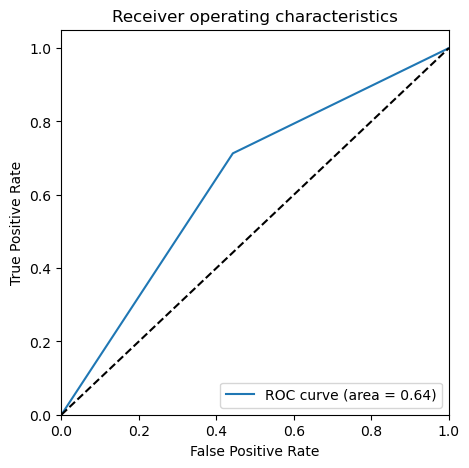

In [53]:
model_1['train_roc'] = plot_roc(model_1['train_preds'].actual, model_1['train_preds'].predicted)

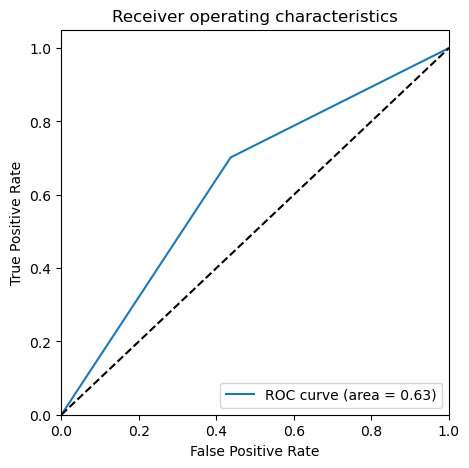

In [54]:
model_1['test_roc'] = plot_roc(model_1['test_preds'].actual, model_1['test_preds'].predicted)

##### The logistic regression model is able to perform better with the cut off of 55
##### It is able to acheive the following metrics




Train Scores:
AUC-ROC Score: 0.6352193168934717
Accuracy: 0.6350664261112022
Precision: 0.6161056668086919
Recall: 0.7129005751848808





Test Scores:
AUC-ROC Score: 0.6324795957598726
Accuracy: 0.6327975507079985
Precision: 0.6185359301544661
Recall: 0.7017142857142857

In [55]:
# Logistic Regression Model 1
# Cut off - 65
model_2 = get_log_reg_model(ol_rem_data[cols], 65)
model_2['model'].summary()

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                pop_bin   No. Observations:                 4026
Model:                            GLM   Df Residuals:                     4011
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.5
Date:                Wed, 26 Apr 2023   Deviance:                       5087.1
Time:                        07:37:11   Pearson chi2:                 4.37e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1153
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         0.3749      0.144      2.608      0.009       0.093       0.657
danceability         1.8515      0.224      8.260      0.000       1.412       2.291
energy              -0.7441      0.194     -3.830      0.000      -1.125      -0.363
instrumentalness    -1.3727      0.156     -8.826      0.000      -1.677      -1.068
liveness            -0.2822      0.380     -0.742      0.458      -1.027       0.463
loudness             0.0812      0.011      7.541      0.000       0.060       0.102
speechiness          1.2532      0.599      2.091      0.037       0.079       2.428
valence             -0.9895      0.165     -5.986      0.000      -1.314      -0.666
key__3               0.3130      0.202      1.547      0.122      -0.083       0.709
key__6               0.2698      0.130      2.082      0.037       0.016       0.524
key__8              -0.0332      0.127     -0.262      0.793      -0.282       0.216
key__10              0.1823      0.135      1.354      0.176      -0.082       0.446
key__11              0.2616      0.124      2.110      0.035       0.019       0.505
time_sig__4          0.3622      0.131      2.768      0.006       0.106       0.619
time_sig__5          0.6221      0.309      2.014      0.044       0.017       1.228
====================================================================================
"""

In [56]:
train_preds = get_model_predictions(model_2['model'], model_2['X_train'], model_2['Y_train'])
test_preds = get_model_predictions(model_2['model'], model_2['X_test'], model_2['Y_test'])
model_2['train_preds'] = train_preds
model_2['test_preds'] = test_preds
model_2['train_preds'].head()

,probabilities,predicted,actual
0,0.476050,0,0
1,0.583005,1,1
2,0.118948,0,0
3,0.545138,1,1
4,0.445723,0,1


In [57]:
model_2['train_metrics'] = get_metrics(model_2['train_preds'].actual, model_2['train_preds'].predicted)

Confusion Matrix:
 [[1032  951]
 [ 414 1629]]
AUC-ROC Score: 0.6588902143994881
Accuracy: 0.6609538002980626
Precision: 0.6313953488372093
Recall: 0.7973568281938326


In [58]:
model_2['test_metrics'] = get_metrics(model_2['test_preds'].actual, model_2['test_preds'].predicted)

Confusion Matrix:
 [[497 396]
 [154 679]]
AUC-ROC Score: 0.6858385011339362
Accuracy: 0.6813441483198146
Precision: 0.6316279069767442
Recall: 0.8151260504201681


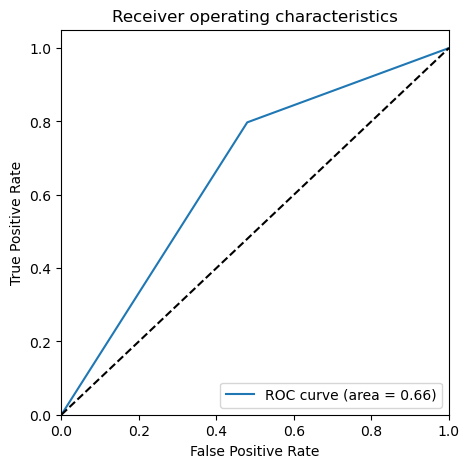

In [59]:
model_2['train_roc'] = plot_roc(model_2['train_preds'].actual, model_2['train_preds'].predicted)

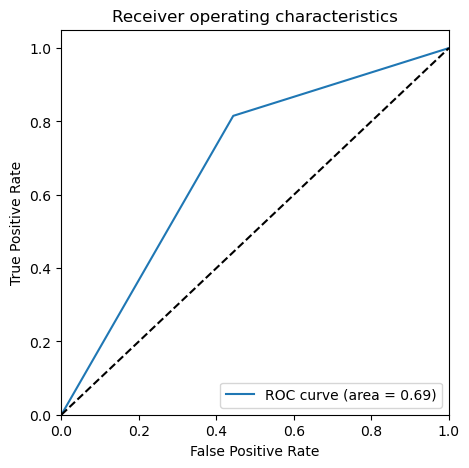

In [60]:
model_2['test_roc'] = plot_roc(model_2['test_preds'].actual, model_2['test_preds'].predicted)

##### The model improved a bit with the following metric scores

In [61]:
## MODEL 3 WITH 75 CUT OFF
model_3 = get_log_reg_model(ol_rem_data[cols], 75)
model_3['model'].summary()

/var/folders/3k/r09dxnws45j1x__8rtq396100000gn/T/ipykernel_19025/2930535882.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ssc_df = split_pop_df.append(unpop_df_to_add).reset_index(drop=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                pop_bin   No. Observations:                  994
Model:                            GLM   Df Residuals:                      979
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -500.55
Date:                Wed, 26 Apr 2023   Deviance:                       1001.1
Time:                        07:38:03   Pearson chi2:                 1.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3156
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         0.2585      0.356      0.726      0.468      -0.440       0.957
danceability         4.2155      0.592      7.123      0.000       3.056       5.375
energy              -2.5663      0.576     -4.452      0.000      -3.696      -1.437
instrumentalness    -3.9634      0.752     -5.272      0.000      -5.437      -2.490
liveness            -0.6091      0.869     -0.701      0.483      -2.311       1.093
loudness             0.3385      0.037      9.250      0.000       0.267       0.410
speechiness          2.1602      1.358      1.591      0.112      -0.502       4.822
valence             -0.7622      0.412     -1.852      0.064      -1.569       0.045
key__3              -0.0978      0.493     -0.198      0.843      -1.065       0.869
key__6               0.4585      0.314      1.460      0.144      -0.157       1.074
key__8              -0.3145      0.287     -1.097      0.273      -0.877       0.248
key__10             -0.0922      0.315     -0.292      0.770      -0.710       0.526
key__11              0.3666      0.272      1.350      0.177      -0.166       0.899
time_sig__4          1.6087      0.447      3.602      0.000       0.733       2.484
time_sig__5          2.0236      1.043      1.941      0.052      -0.020       4.067
====================================================================================
"""

In [62]:
train_preds = get_model_predictions(model_3['model'], model_3['X_train'], model_3['Y_train'])
test_preds = get_model_predictions(model_3['model'], model_3['X_test'], model_3['Y_test'])
model_3['train_preds'] = train_preds
model_3['test_preds'] = test_preds
model_3['train_preds'].head()

,probabilities,predicted,actual
0,0.654251,1,0
1,0.623825,1,1
2,0.139224,0,0
3,0.250233,0,0
4,0.821887,1,1


In [63]:
model_3['train_metrics'] = get_metrics(model_3['train_preds'].actual, model_3['train_preds'].predicted)

Confusion Matrix:
 [[339 158]
 [ 78 419]]
AUC-ROC Score: 0.7625754527162978
Accuracy: 0.7625754527162978
Precision: 0.7261698440207972
Recall: 0.8430583501006036


In [64]:
model_3['test_metrics'] = get_metrics(model_3['test_preds'].actual, model_3['test_preds'].predicted)

Confusion Matrix:
 [[144  69]
 [ 40 173]]
AUC-ROC Score: 0.744131455399061
Accuracy: 0.744131455399061
Precision: 0.7148760330578512
Recall: 0.812206572769953


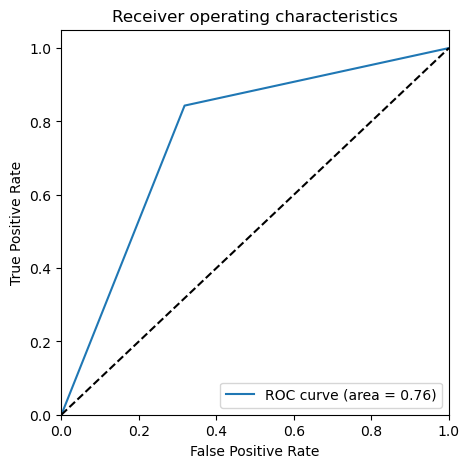

In [65]:
model_3['train_roc'] = plot_roc(model_3['train_preds'].actual, model_3['train_preds'].predicted)

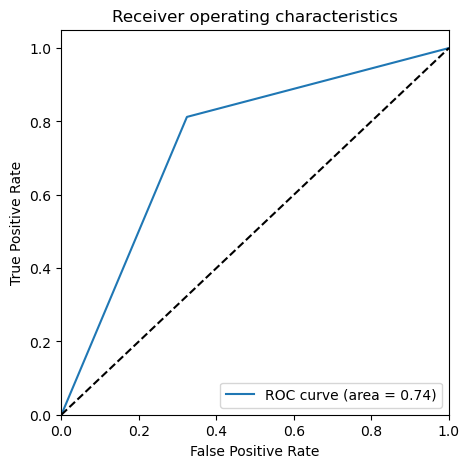

In [66]:
model_3['test_roc'] = plot_roc(model_3['test_preds'].actual, model_3['test_preds'].predicted)

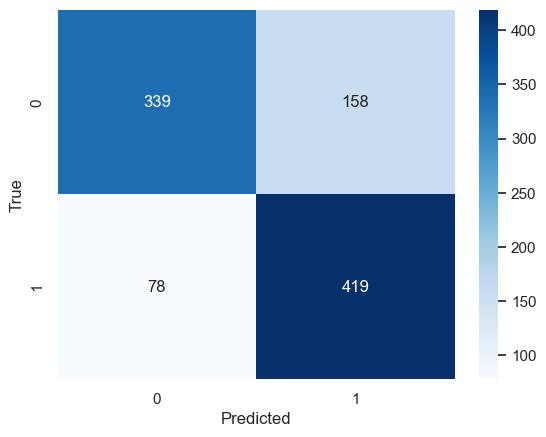

In [70]:
# Compute confusion matrix
labels = np.unique(model_3['train_preds'].actual)
cm = confusion_matrix(model_3['train_preds'].actual, model_3['train_preds'].predicted, labels=labels)

# Create heatmap plot
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

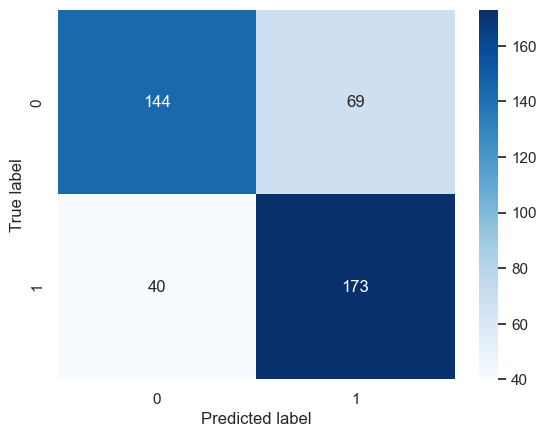

In [71]:
# Compute confusion matrix
labels = np.unique(model_3['test_preds'].actual)
cm = confusion_matrix(model_3['test_preds'].actual, model_3['test_preds'].predicted, labels=labels)

# Create heatmap plot
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

## Conclusion:
#### We won't be considering cutoffs greater than 75 since it reduces the sample size
#### The final scores of the model are as follows:


Train Scores:
AUC-ROC Score: 0.7625754527162978
Accuracy: 0.7625754527162978
Precision: 0.7261698440207972
Recall: 0.8430583501006036


Test Scores:
AUC-ROC Score: 0.744131455399061
Accuracy: 0.744131455399061
Precision: 0.7148760330578512
Recall: 0.812206572769953